<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/CNN_for_CIFAR_10_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0
y_train , y_test = y_train.flatten() , y_test.flatten()
print(x_train.shape)
print(y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000,)


In [ ]:
K = len(set(y_train))
print(K)

10


In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7229 - accuracy: 0.7542 - val_loss: 1.2876 - val_accuracy: 0.6221
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5898 - accuracy: 0.7963 - val_loss: 0.6966 - val_accuracy: 0.7674
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4984 - accuracy: 0.8288 - val_loss: 0.7004 - val_accuracy: 0.7702
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4139 - accuracy: 0.8585 - val_loss: 0.6512 - val_accuracy: 0.7944
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3552 - accuracy: 0.8769 - val_loss: 0.6012 - val_accuracy: 0.8153
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2974 - accuracy: 0.8975 - val_loss: 0.6404 - val_accuracy: 0.8105
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2516 - accuracy: 0.9127 - val_loss: 0.5940 - val_ac

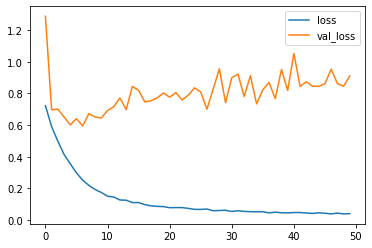

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

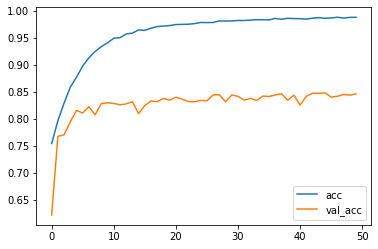

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 29s 18ms/step - loss: 1.4571 - accuracy: 0.4925 - val_loss: 1.2383 - val_accuracy: 0.5751
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.0117 - accuracy: 0.6459 - val_loss: 1.1752 - val_accuracy: 0.6076
Epoch 3/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.8561 - accuracy: 0.7027 - val_loss: 0.9403 - val_accuracy: 0.6934
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.7694 - accuracy: 0.7363 - val_loss: 0.8430 - val_accuracy: 0.7126
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.6964 - accuracy: 0.7620 - val_loss: 0.6357 - val_accuracy: 0.7892
Epoch 6/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.6464 - accuracy: 0.7795 - val_loss: 0.5853 - val_accuracy: 0.8034
Epoch 7/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.6010 - accuracy: 0.7954 - val_loss: 0.5804 -

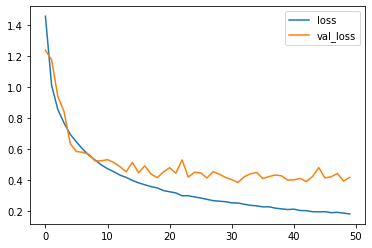

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

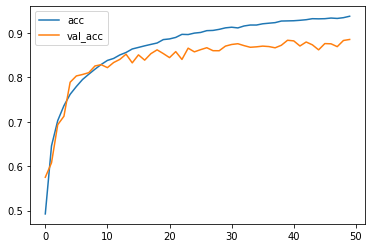

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        1849